In [7]:
from preprocessing import Preprocessor
from network import RNN

In [8]:
pp = Preprocessor(train_path="datasets/no1_train.csv", val_path="datasets/no1_validation.csv")
train_df, val_df = pp.preprocess()

In [9]:
seq_len = 72
X_feat = ["hydro", "micro", "thermal", "wind", "river", "total", "sys_reg", "flow", "time_of_day_sin", "time_of_day_cos", "time_of_week_sin", "time_of_week_cos", "time_of_year_sin", "time_of_year_cos", "y_24h", "y_yesterday", "y_prev"]
num_feat = len(X_feat)
rnn = RNN(seq_len=seq_len, num_feat=num_feat)

In [10]:
train_X = pp.df_to_x(train_df[X_feat], seq_len=seq_len)
train_Y = pp.df_to_y(train_df["y"], seq_len=seq_len)
val_X = pp.df_to_x(val_df[X_feat], seq_len=seq_len)
val_Y = pp.df_to_y(val_df["y"], seq_len=seq_len)

In [11]:
# Maybe change batch_size to make training go faster
rnn.model.fit(train_X,
                train_Y,
                validation_data=(val_X, val_Y),
                epochs=7,
                batch_size=256)

Epoch 1/7


2022-04-21 17:17:05.432034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-21 17:17:05.827842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-21 17:17:06.472599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


878/878 [==============================] - ETA: 0s - loss: 0.0057

2022-04-21 17:17:59.761422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-21 17:17:59.865309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


878/878 [==============================] - 58s 64ms/step - loss: 0.0057 - val_loss: 0.0041
Epoch 2/7
878/878 [==============================] - 55s 63ms/step - loss: 9.6742e-04 - val_loss: 0.0029
Epoch 3/7
878/878 [==============================] - 56s 63ms/step - loss: 8.0651e-04 - val_loss: 0.0027
Epoch 4/7
878/878 [==============================] - 54s 62ms/step - loss: 7.3172e-04 - val_loss: 0.0028
Epoch 5/7
878/878 [==============================] - 54s 62ms/step - loss: 6.8273e-04 - val_loss: 0.0021
Epoch 6/7
878/878 [==============================] - 53s 61ms/step - loss: 6.3663e-04 - val_loss: 0.0018
Epoch 7/7
878/878 [==============================] - 53s 60ms/step - loss: 5.9214e-04 - val_loss: 0.0013


2022-04-21 17:23:28.488252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-21 17:23:28.550830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


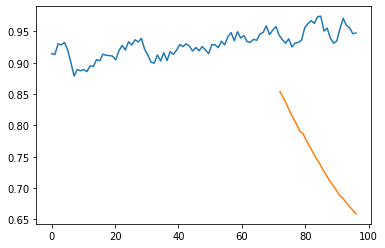

In [12]:
rnn.predict_ahead(x=val_X, y=val_Y, start=0, steps_ahead=24)